In [1]:
import numpy as np
from opensearchpy import OpenSearch
from opensearch_dsl import  Search
import matplotlib.pyplot as plt
import datetime
import re
from astropy.time import Time
from lcocommissioning.common.common import dateformat


In [2]:
def getoverheads(cameraname, daysback=120):
    opensearch_url = "https://opensearch.lco.global"

    client=OpenSearch (opensearch_url, timeout=120)

    query= { 
        'query': {  
            "bool": {
                'must': [
                    {"match": {"agent": cameraname}},
                    {"match": {"message": "last readout time"}},
                    {"range": {"@timestamp": {"gte": f"now-{daysback}d", "lt": "now"}}}
                ]
            },
        },
       'size': 10000,
  
    }
    
    response = client.search( body = query, index  ="logstash*")
    hits = response['hits']['hits']
 
    messages   = [hit['_source']['message'] for hit in hits]
    timestamps = [hit['_source']['@timestamp'] for hit in hits]
    timestamps = Time(timestamps, format='isot', scale='utc').to_datetime()

    return  messages, timestamps

#queryreturn, timestamps = getoverheads(cameraname="sq30")

In [3]:
def message2time(message):
    expr="readout time:\ (\d+\.\d+) seconds"
    a=re.search (expr, message)
    return (float) (a.group(1)) if a is not None else 0.

In [4]:
def plothisto(myreadouttimes, name):
    plt.figure()
    plt.hist(myreadouttimes, bins=100, range=(0,12))
    plt.title (f"QHY600 ({name}) readout times")
    plt.xlabel ("readout time[s]")
    plt.savefig (f"freadouttimes_{name}.png")
    plt.close()

sq30 10000


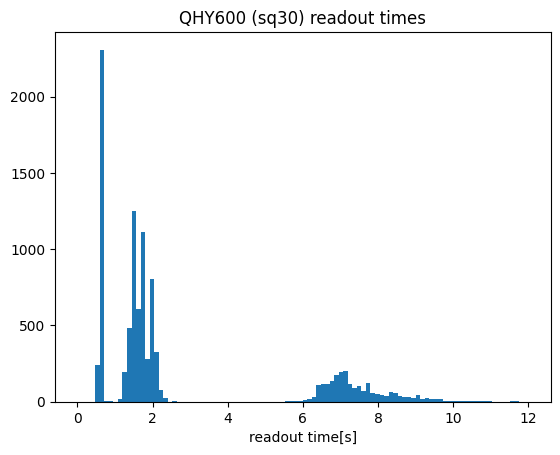

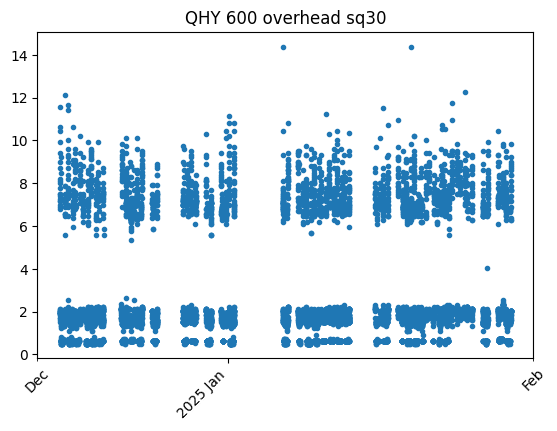

sq31 10000


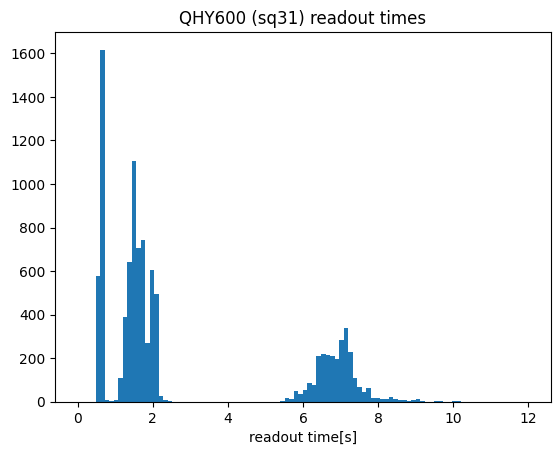

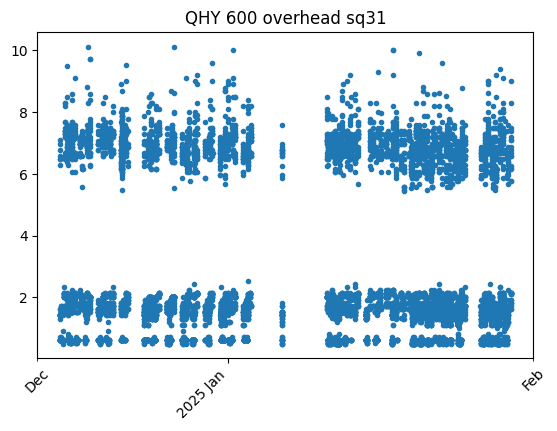

sq32 10000


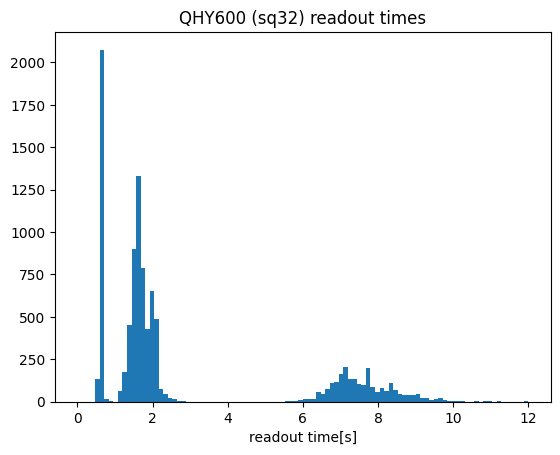

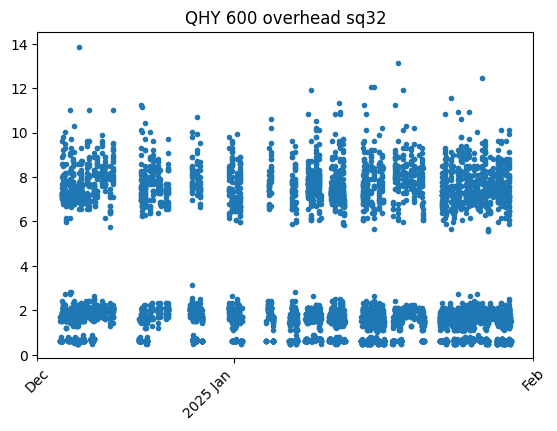

sq33 10000


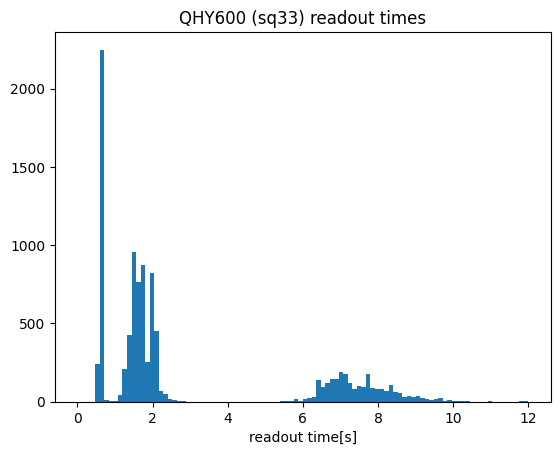

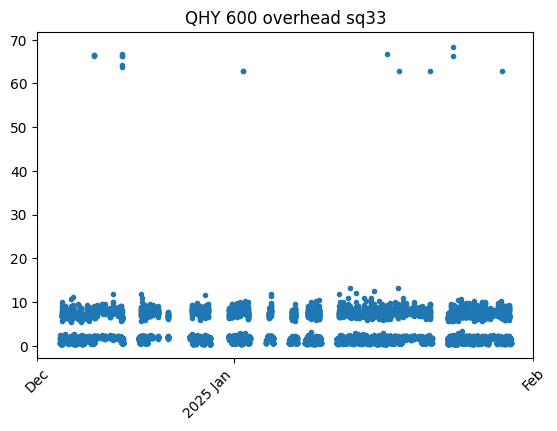

sq34 10000


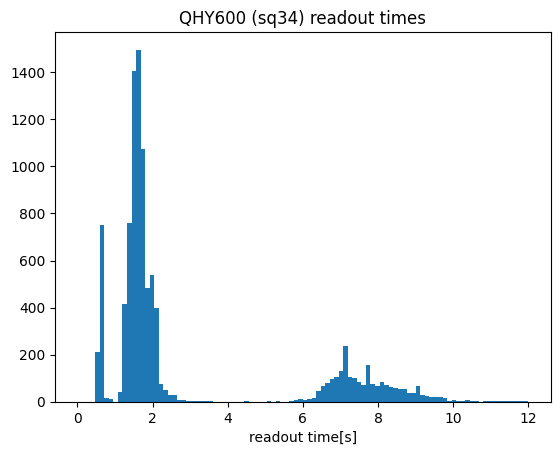

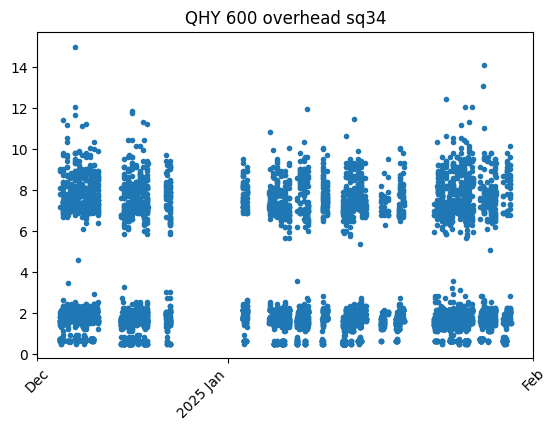

sq35 10000


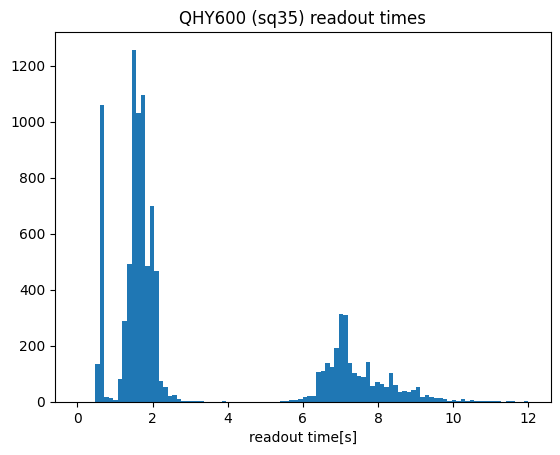

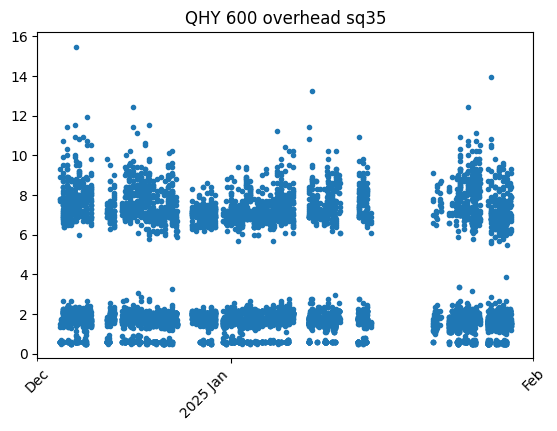

sq36 10000


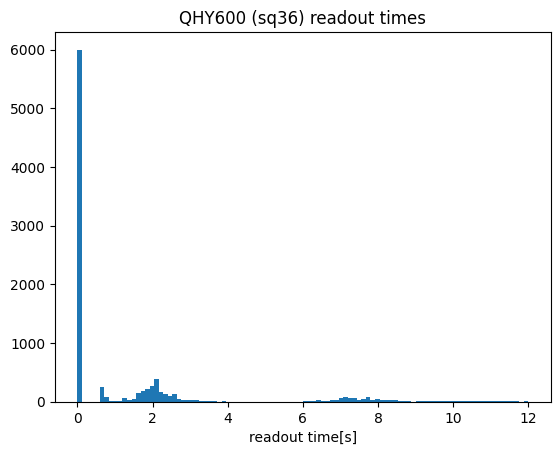

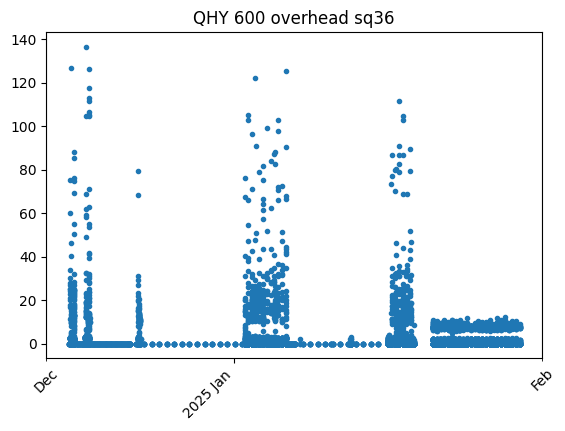

sq37 10000


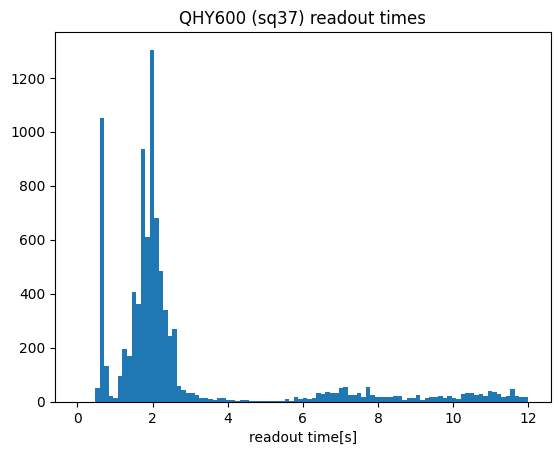

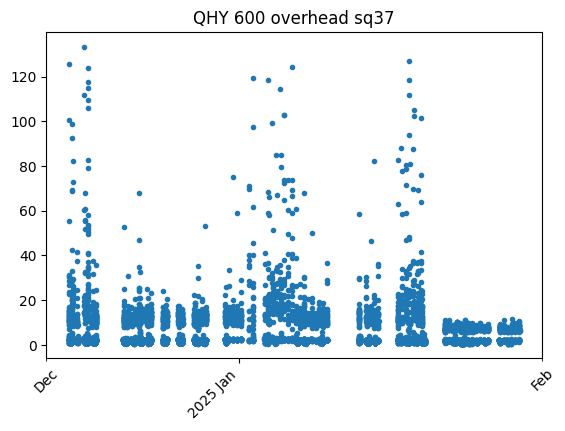

sq38 0


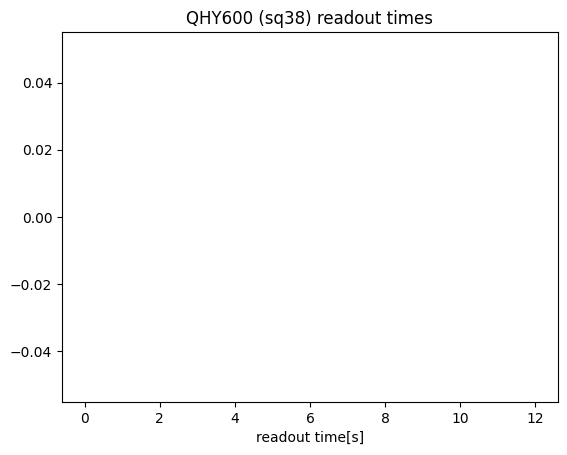

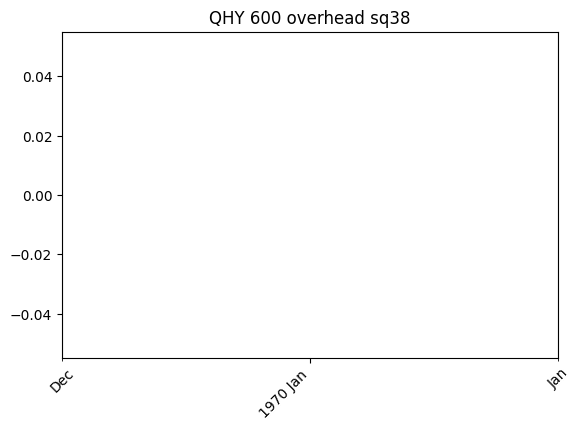

sq39 10000


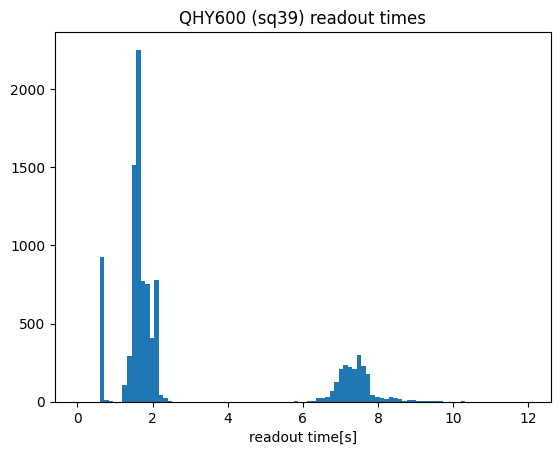

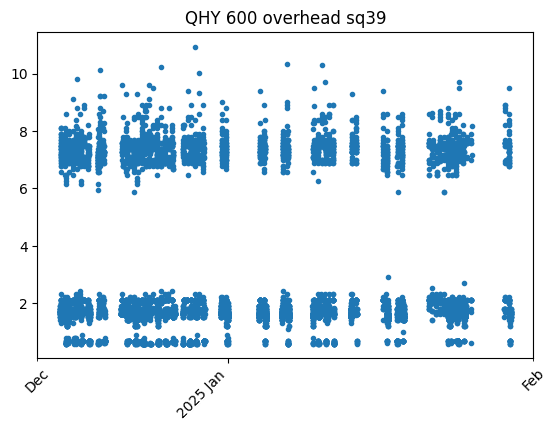

sq40 10000


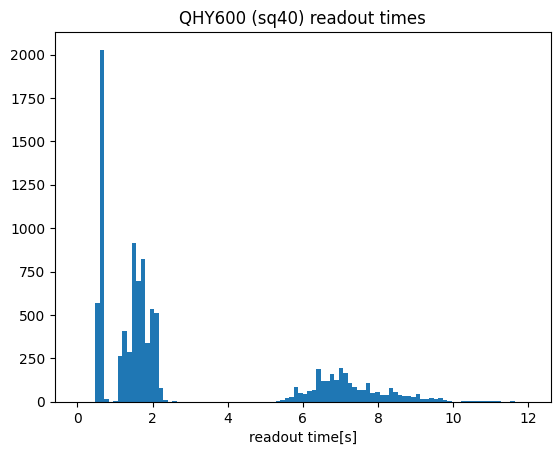

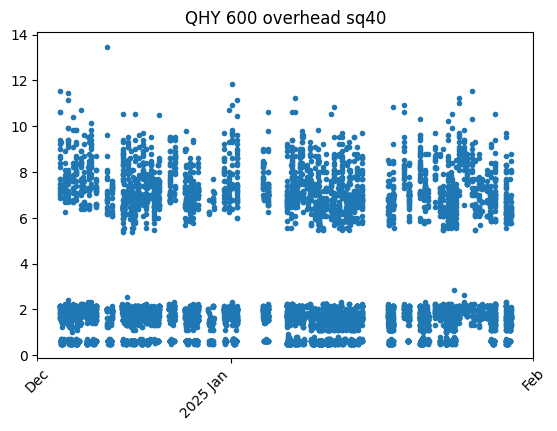

In [5]:
cameras = ['sq30','sq31', 'sq32','sq33','sq34','sq35','sq36','sq37','sq38','sq39','sq40']

for camera in cameras:
    queryreturn, timestamps = getoverheads(cameraname=camera)
    print (camera, len(queryreturn))
    readouttimes = [message2time(message) for message in queryreturn]
    timestamps = [timestamp for timestamp in timestamps]

    plothisto(readouttimes, camera)

    plt.figure()
    plt.plot (timestamps, readouttimes, '.')
    plt.title (f"QHY 600 overhead {camera}")
    dateformat()
    plt.show()
